In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
import warnings
warnings.filterwarnings('ignore')


In [19]:
df=pd.read_csv("titanic-training-data.csv")

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
df.shape

(891, 12)

In [24]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [25]:
median1=df["Age"].median()

In [26]:
median1

28.0

In [27]:
df["Age"]=df["Age"].replace(np.nan,median1)

In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [29]:
mode1=df["Embarked"].mode().values[0]

In [30]:
mode1

'S'

In [31]:
df["Embarked"]=df["Embarked"].replace(np.nan,mode1)

In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Drop insignificant columns

In [33]:
df=df.drop(["Cabin","PassengerId","Name","Ticket"],axis=1)

In [34]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [35]:
duplicate=df.duplicated()
print(duplicate.sum())

116


<Axes: xlabel='Age'>

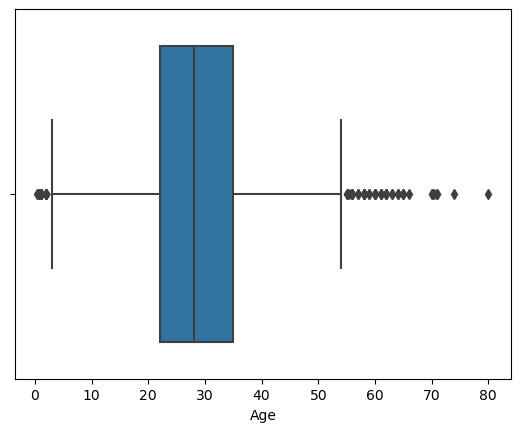

In [36]:
sns.boxplot(x="Age",data=df)

In [37]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [38]:
lowAge,uppAge=remove_outlier(df["Age"])
df["Age"]=np.where(df["Age"]>uppAge,uppAge,df["Age"])
df["Age"]=np.where(df["Age"]<lowAge,lowAge,df["Age"])


<Axes: xlabel='Age'>

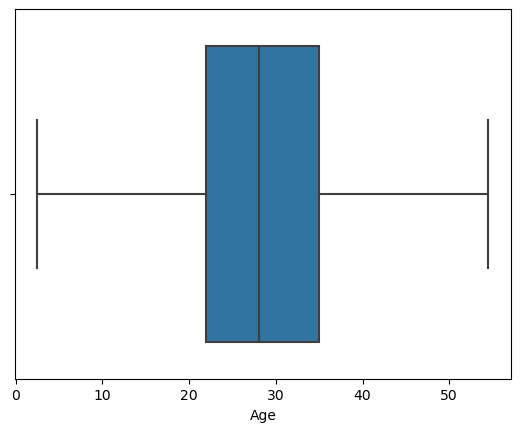

In [39]:
sns.boxplot(x="Age",data=df)

<Axes: xlabel='Fare'>

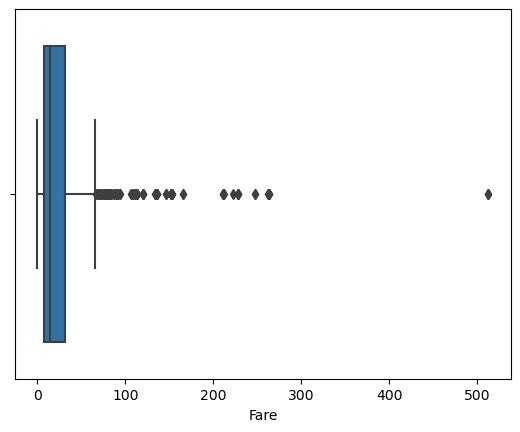

In [40]:
sns.boxplot(x="Fare",data=df)

In [41]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [42]:
lowFare,uppFare=remove_outlier(df["Fare"])
df["Fare"]=np.where(df["Fare"]>uppFare,uppFare,df["Fare"])
df["Fare"]=np.where(df["Fare"]<lowFare,lowFare,df["Fare"])

<Axes: xlabel='Fare'>

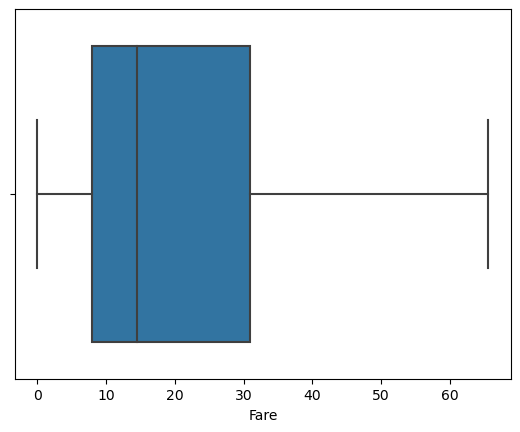

In [43]:
sns.boxplot(x="Fare",data=df)

###Encoding

In [44]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [45]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6344,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [46]:
df=pd.get_dummies(df,columns=["Sex","Embarked"])

In [47]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,65.6344,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [48]:
df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female       bool
Sex_male         bool
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
dtype: object

In [49]:
df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [51]:
y=df[["Survived"]]
x=df.drop(["Survived"],axis=1)

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [53]:
model_log=LogisticRegression()

In [54]:
model_log.fit(x_train,y_train)

LogisticRegression()

In [55]:
model_log.score(x_train,y_train)

0.8105939004815409

In [56]:
model_log.score(x_test,y_test)

0.7798507462686567

In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

<Axes: >

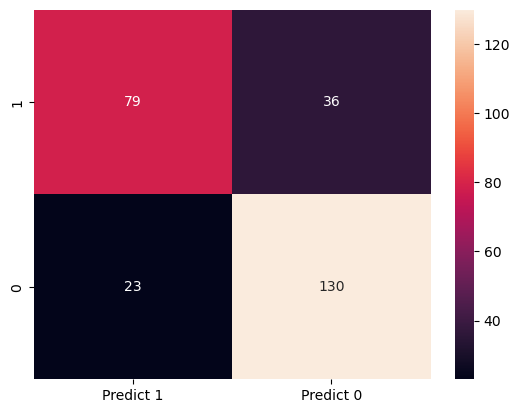

In [58]:
predictions=model_log.predict(x_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,predictions, labels=[1,0])
df_cm = pd.DataFrame (cm, index = [i for i in ["1","0"]],
                      columns = [i for i in ["Predict 1", "Predict 0"]])

sns.heatmap(df_cm, annot=True, fmt='g')

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [62]:
model_dtc=DecisionTreeClassifier(max_depth=2)

In [63]:
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [64]:
model_dtc.score(x_train,y_train)

0.8154093097913323

In [65]:
model_dtc.score(x_test,y_test)

0.7350746268656716

In [66]:
from sklearn.ensemble import BaggingClassifier

In [67]:
model_bcl=BaggingClassifier(n_estimators=10,base_estimator=model_dtc, max_samples=1)

In [68]:
model_bcl.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                  max_samples=1)

In [69]:
model_bcl.score(x_train,y_train)

0.6356340288924559

In [70]:
model_bcl.score(x_test,y_test)

0.5708955223880597

In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [72]:
model_abc=AdaBoostClassifier(n_estimators=20)
model_gbc=GradientBoostingClassifier(n_estimators=40,max_depth=1)
model_rfc=RandomForestClassifier(n_estimators=5,min_samples_split=2,max_features='sqrt',)

In [73]:
model_abc.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=20)

In [74]:
model_abc.score(x_train,y_train)

0.8394863563402889

In [75]:
model_abc.score(x_test,y_test)

0.7835820895522388

In [76]:
model_gbc.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=1, n_estimators=40)

In [77]:
model_gbc.score(x_train,y_train)

0.8170144462279294

In [78]:
model_gbc.score(x_test,y_test)

0.7574626865671642

In [79]:
model_rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [80]:
model_rfc.score(x_train,y_train)

0.9662921348314607

In [81]:
model_rfc.score(x_test,y_test)

0.7649253731343284

### Data set-2(Pima diabeties dataset)

In [82]:
df=pd.read_csv("pima-indians-diabetes-2.csv")

In [83]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [84]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [85]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [86]:
df.shape

(768, 9)

In [87]:
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [88]:
duplicate=df.duplicated()
print(duplicate.sum())

0


<Axes: xlabel='Preg'>

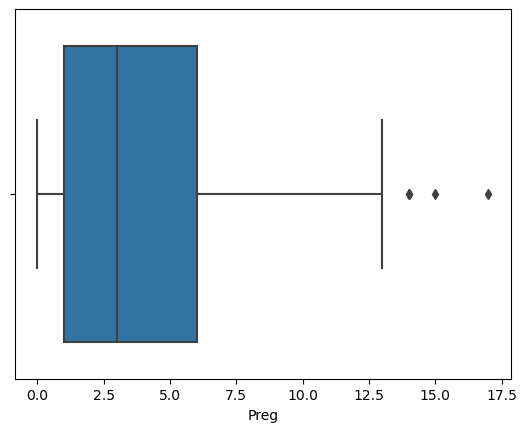

In [89]:
sns.boxplot(x="Preg",data=df)

In [90]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [91]:
lowPreg,uppPreg=remove_outlier(df["Preg"])
df["Preg"]=np.where(df["Preg"]>uppPreg,uppPreg,df["Preg"])
df["Preg"]=np.where(df["Preg"]<lowPreg,lowPreg,df["Preg"])

<Axes: xlabel='Preg'>

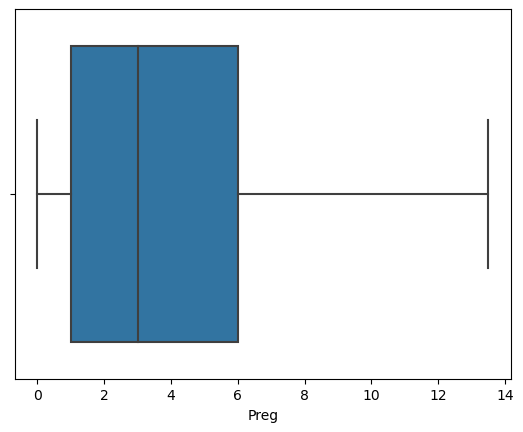

In [92]:
sns.boxplot(x="Preg",data=df)

<Axes: xlabel='Plas'>

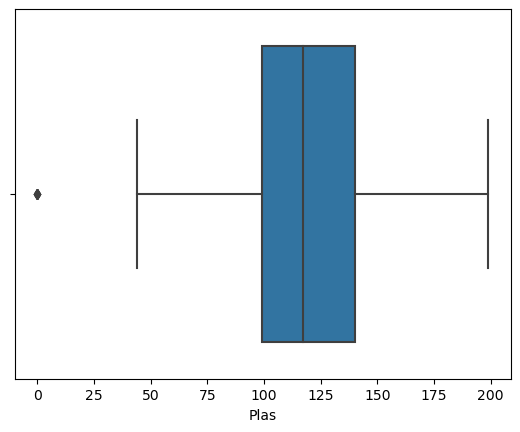

In [93]:
sns.boxplot(x="Plas",data=df)

In [94]:
lowPlas,uppPlas=remove_outlier(df["Plas"])
df["Plas"]=np.where(df["Plas"]>uppPlas,uppPlas,df["Plas"])
df["Plas"]=np.where(df["Plas"]<lowPlas,lowPlas,df["Plas"])

<Axes: xlabel='Plas'>

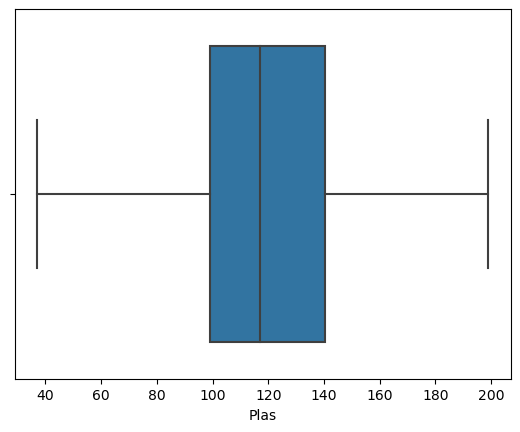

In [95]:
sns.boxplot(x="Plas",data=df)

In [96]:
df.dtypes

Preg     float64
Plas     float64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [97]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72,35,0,33.6,0.627,50,1
1,1.0,85.0,66,29,0,26.6,0.351,31,0
2,8.0,183.0,64,0,0,23.3,0.672,32,1
3,1.0,89.0,66,23,94,28.1,0.167,21,0
4,0.0,137.0,40,35,168,43.1,2.288,33,1


In [98]:
df=pd.get_dummies(df,columns=["Preg","Pres"])

In [99]:
df.head()

,Plas,skin,test,mass,pedi,age,class,Preg_0.0,Preg_1.0,Preg_2.0,Preg_3.0,Preg_4.0,Preg_5.0,Preg_6.0,Preg_7.0,Preg_8.0,Preg_9.0,Preg_10.0,Preg_11.0,Preg_12.0,Preg_13.0,Preg_13.5,Pres_0,Pres_24,Pres_30,Pres_38,Pres_40,Pres_44,Pres_46,Pres_48,Pres_50,Pres_52,Pres_54,Pres_55,Pres_56,Pres_58,Pres_60,Pres_61,Pres_62,Pres_64,Pres_65,Pres_66,Pres_68,Pres_70,Pres_72,Pres_74,Pres_75,Pres_76,Pres_78,Pres_80,Pres_82,Pres_84,Pres_85,Pres_86,Pres_88,Pres_90,Pres_92,Pres_94,Pres_95,Pres_96,Pres_98,Pres_100,Pres_102,Pres_104,Pres_106,Pres_108,Pres_110,Pres_114,Pres_122
0,148.0,35,0,33.6,0.627,50,1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,85.0,29,0,26.6,0.351,31,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,183.0,0,0,23.3,0.672,32,1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,89.0,23,94,28.1,0.167,21,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,137.0,35,168,43.1,2.288,33,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [102]:
from sklearn.ensemble import BaggingClassifier

In [103]:
model_bcl=BaggingClassifier(n_estimators=110,base_estimator=model_dtc)

In [104]:
model_bcl.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                  n_estimators=110)

In [105]:
model_bcl.score(x_train,y_train)

0.8170144462279294

In [106]:
model_bcl.score(x_test,y_test)

0.746268656716418

In [107]:
df=pd.read_csv("concrete.csv")

In [108]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [109]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [110]:
df.shape

(1030, 9)

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [118]:
from sklearn.ensemble import BaggingRegressor

In [119]:
model_bcl=BaggingRegressor(n_estimators=100,base_estimator=model_dtc)

In [120]:
model_bcl.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeClassifier(max_depth=2),
                 n_estimators=100)

In [121]:
model_bcl.score(x_train,y_train)

0.38930447870778273

In [122]:
model_bcl.score(x_test,y_test)

0.15659889741403787

In [123]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [124]:
AdaBoostClassifier(n_estimators=100, base_estimator='deprecated')
model_gbc=GradientBoostingClassifier(n_estimators=100,max_depth=1)
model_rfc=RandomForestClassifier(n_estimators=50,max_features=5,max_depth=3)

In [125]:
model_abc.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=20)

In [126]:
model_abc.score(x_train,y_train)

0.8394863563402889

In [127]:
model_abc.score(x_test,y_test)

0.7835820895522388

In [128]:
model_gbc.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=1)

In [129]:
model_gbc.score(x_train,y_train)

0.8330658105939005

In [130]:
model_gbc.score(x_test,y_test)

0.7723880597014925

In [131]:
model_rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, max_features=5, n_estimators=50)

In [132]:
model_rfc.score(x_train,y_train)

0.8539325842696629

In [133]:
model_rfc.score(x_test,y_test)

0.7798507462686567